<a href="https://colab.research.google.com/github/KimDoye1109/AI-programming/blob/main/SIFT_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

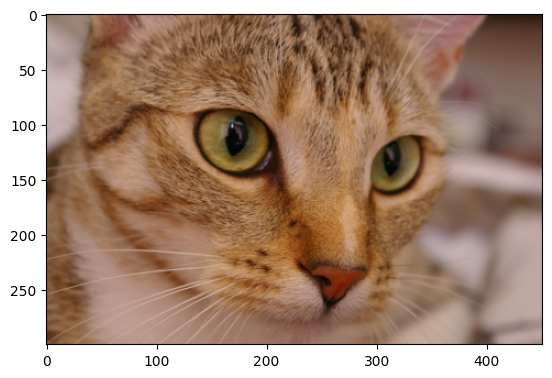

In [57]:
# 이미지 제공
img = data.chelsea()
plt.imshow(img)
plt.show()

(300, 451, 3)


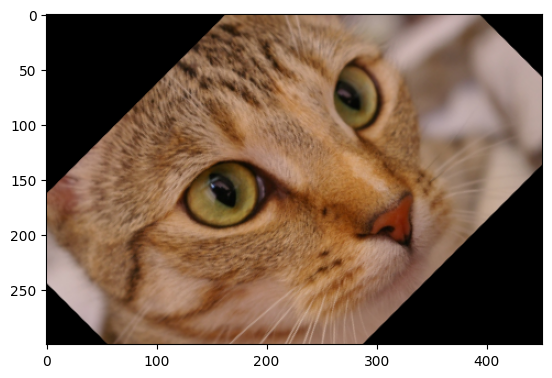

In [58]:
print(img.shape)
rows, cols, color = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # 45도 회전, 스케일 1
transformed_image = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(transformed_image)
plt.show()

In [59]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img, None)
keypoints2, descriptors2 = sift.detectAndCompute(transformed_image, None)

In [60]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

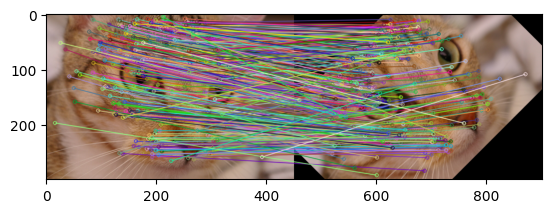

total matches 372


In [64]:
img_matches = cv2.drawMatches(img, keypoints1, transformed_image, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.show()
print('total matches:',len(matches))

In [40]:
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

M_estimated, inliers = cv2.estimateAffine2D(src_pts, dst_pts)

In [42]:
print("True Transformation Matrix:")
print(M)
print("Estimated Transformation Matrix:")
print(M_estimated)

True Transformation Matrix:
[[  0.70710678   0.70710678 -40.01859634]
 [ -0.70710678   0.70710678 203.38656198]]
Estimated Transformation Matrix:
[[  0.70695873   0.70729075 -40.12933335]
 [ -0.70732894   0.7072798  203.64575928]]
